In [1]:
# Importing necessary libraries
import numpy as np  # NumPy library for numerical operations
import pandas as pd  # Pandas library for data manipulation and analysis
from statsmodels.tsa.stattools import adfuller  # Function for Augmented Dickey-Fuller test
import matplotlib.pyplot as plt  # Matplotlib's pyplot for plotting graphs


In [2]:
# Reading and initial processing of data
data = pd.read_csv("./dataset.csv", index_col='date')  # Reading data from CSV and setting 'date' as index
data.head()  # Displaying the first few rows of the dataset
data.describe()  # Describing the statistical aspects of data


,Temperature,Humidity,Light,CO2
count,9752.000000,9752.000000,9752.000000,9752.000000
mean,21.001768,29.891910,123.067930,753.224832
std,1.020693,3.952844,208.221275,297.096114
min,19.500000,21.865000,0.000000,484.666667
25%,20.290000,26.642083,0.000000,542.312500
50%,20.790000,30.200000,0.000000,639.000000
75%,21.533333,32.700000,208.250000,831.125000
max,24.390000,39.500000,1581.000000,2076.500000


In [3]:
# Data splitting
train_size = int(len(data) * 0.7)  # Determining the size of the training set (70% of the data)
train, test = data.iloc[:train_size], data.iloc[train_size:]  # Splitting the dataset into training and testing sets


In [4]:
# Checking stationarity
adf_result = adfuller(train["CO2"])  # Applying Augmented Dickey-Fuller test to check stationarity

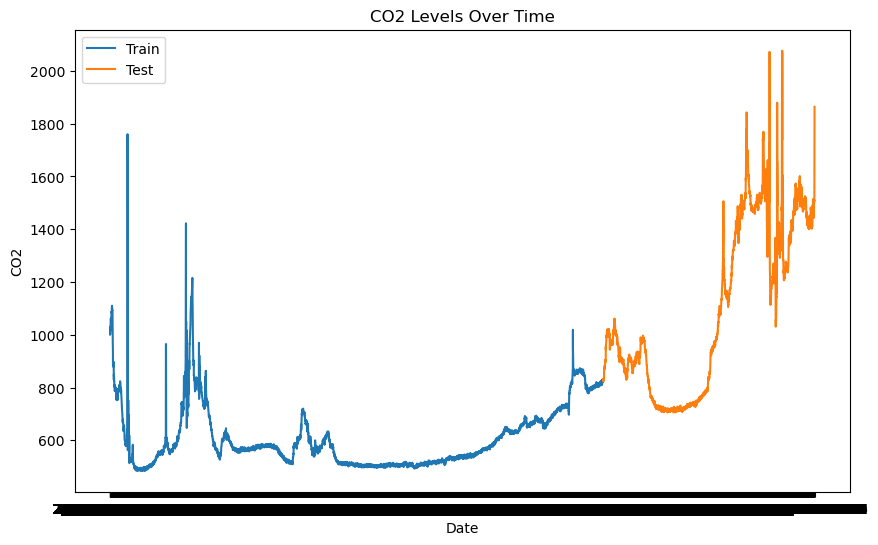

In [5]:
# Plotting the data
plt.figure(figsize=(10, 6))  # Setting the figure size for the plot
plt.plot(train['CO2'], label='Train')  # Plotting the training data
plt.plot(test['CO2'], label='Test')  # Plotting the testing data
plt.title('CO2 Levels Over Time')  # Title of the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('CO2')  # Y-axis label
plt.legend()  # Adding a legend to the plot
plt.show()  # Displaying the plot


In [6]:
from pmdarima import auto_arima

 


In [7]:
# ARIMA modeling
from pmdarima import auto_arima  # Importing the auto_arima function from pmdarima
print(train['CO2'])  # Printing CO2 values from the train set
train1 = train['CO2']  # Creating a new series 'train1' for ARIMA modeling
auto_model = auto_arima(train1, seasonal=False, trace=True, error_action="ignore", suppress_warnings=True)  # Fitting the ARIMA model
auto_model.summary()  # Displaying the summary of the model

date
2/11/2015 14:48    1029.666667
2/11/2015 14:49    1000.000000
2/11/2015 14:50    1003.750000
2/11/2015 14:51    1009.500000
2/11/2015 14:51    1005.666667
                      ...     
2/16/2015 8:29      819.000000
2/16/2015 8:30      819.000000
2/16/2015 8:31      823.000000
2/16/2015 8:31      828.666667
2/16/2015 8:32      822.500000
Name: CO2, Length: 6826, dtype: float64
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=59233.687, Time=3.94 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=60029.820, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=59997.355, Time=0.39 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=59979.849, Time=1.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=60027.837, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=59312.969, Time=3.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=59244.234, Time=2.36 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=59234.999, Time=8.66 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept  

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6826
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -29610.883
Date:                Wed, 03 Jan 2024   AIC                          59231.767
Time:                        11:20:13   BIC                          59265.909
Sample:                             0   HQIC                         59243.547
                               - 6826                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9575      0.008    124.925      0.000       0.943       0.973
ar.L2         -0.3979      0.007    -60.767      0.000      -0.411      -0.385
ma.L1         -0.9648      0.008   -116.149      0.000      -0.981      -0.949
ma.L2          0.1666      0.008     19.984      0.000       0.150       0.183
sigma2       343.5178      0.225   1524.480      0.000     343.076     343.959
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         689791308.87
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.03   Skew:                            24.25
Prob(H) (two-sided):                  0.00   Kurtosis:                      1559.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
# Further ARIMA modeling and forecasting
from statsmodels.tsa.arima.model import ARIMA  # Importing the ARIMA model
data.index.freq = "1min"  # Setting the frequency of the data index to 1 minute
data.index = pd.DatetimeIndex(data.index).to_period("1min")  # Converting the data index to DatetimeIndex with 1-minute period
temp_data = data['CO2']  # Isolating the CO2 column for further processing
split_point = int(0.7 * len(temp_data))  # Determining the split point for training and testing
train_fit, test_fit = temp_data[:split_point], temp_data[split_point:]  # Splitting the data into training and testing sets


In [10]:
model = ARIMA(train_fit, order=(2, 1, 2))  # Initializing the ARIMA model with specified order
fitted_model = model.fit()  # Fitting the ARIMA model

In [11]:
forecast = fitted_model.forecast(steps=len(test))  # Forecasting using the fitted model

In [12]:
# Adjusting index for plotting
train.index = train_fit.index.to_timestamp()  # Converting train index to timestamp
test.index = test_fit.index.to_timestamp()  # Converting test index to timestamp
forecast.index = forecast.index.to_timestamp()  # Converting forecast index to timestamp


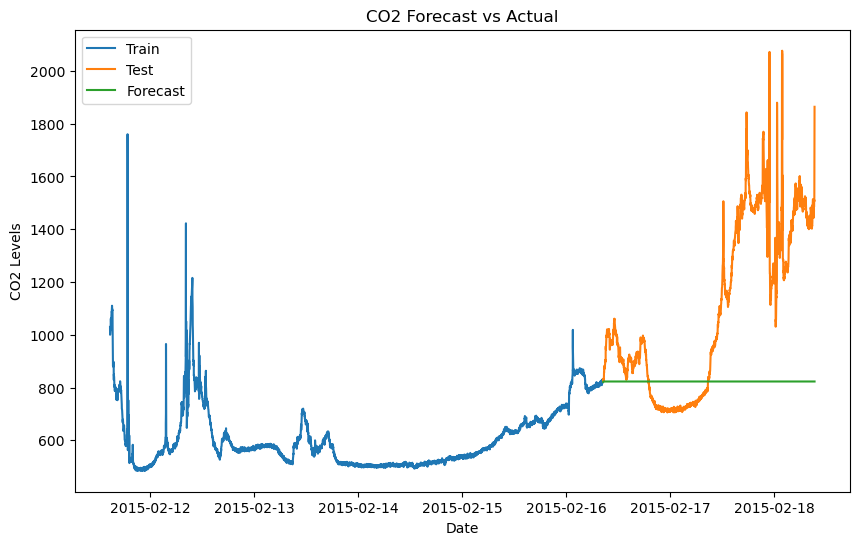

In [13]:
# Plotting the forecast vs actual data
plt.figure(figsize=(10, 6))  # Setting the figure size for the plot
plt.plot(train.index, train_fit, label='Train')  # Plotting the training data
plt.plot(test.index, test_fit, label='Test')  # Plotting the testing data
plt.plot(test.index, forecast, label='Forecast')  # Plotting the forecasted data
plt.title('CO2 Forecast vs Actual')  # Title of the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('CO2 Levels')  # Y-axis label
plt.legend()  # Adding a legend to the plot
plt.show()  # Displaying the plot


In [14]:
print(forecast.shape, test.shape)  # Printing the shapes of the forecast and test data for comparison


(2926,) (2926, 4)
